In [2]:
import os
import random

from fastai import *
from fastai.tabular import *
from fastai.callbacks.tracker import EarlyStoppingCallback, ReduceLROnPlateauCallback, SaveModelCallback
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

%reload_ext autoreload
%autoreload 2

In [3]:
Path??

In [2]:
path = Path('data')

In [3]:
pd.set_option('display.max_columns', None)

In [20]:
train_df_orig = pd.read_csv(path/'train.csv')
test_df_orig = pd.read_csv(path/'test.csv')

In [5]:
train_df_orig.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.

In [6]:
# From QuangHoàng
# https://www.kaggle.com/quanghm/fastai-1-0-tabular-learner-with-ensemble/notebook

class roc(Callback):
    '''
    ROC_AUC metric callback for fastai. Compute ROC score over each batch and returns the average over batches.
    TO DO: rolling average
    '''
    def on_epoch_begin(self, **kwargs):
        self.total = 0
        self.batch_count = 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = F.softmax(last_output, dim=1)
        # roc_auc_score does not work on batches which does not contain both classes.
        try:
            roc_score = roc_auc_score(to_np(last_target), to_np(preds[:,1]))
            self.total += roc_score
            self.batch_count += 1
        except:
            pass
    
    def on_epoch_end(self, num_batch, **kwargs):
        self.metric = self.total/self.batch_count

In [21]:
def learner_from_df(train_df, test_df, 
                    bs=2048, procs=[Normalize], seed=1, 
                    layers=[1000,100], ps=0.66, cbs=None):
    
    random.seed(seed)
    distr = 1
    
    while distr >= .002:
        ### https://www.kaggle.com/quanghm/fastai-1-0-tabular-learner-with-ensemble/notebook
        valid_idx = random.sample(list(train_df.index.values), int(len(train_df)*0.05))
        distr = abs((train_df.iloc[valid_idx].target.sum() / len(valid_idx)) 
                    - (train_df.target.sum() / len(train_df)))
        ###
        
    print(f'Difference between train and valid distribution: {distr}')        
    
    cont_names = [c for c in train_df.columns if c not in ['ID_code', 'target']]
    
    data = TabularDataBunch.from_df(path=path, df=train_df, 
                                    dep_var=dep_var, 
                                    valid_idx=valid_idx, 
                                    cat_names=cat_names, 
                                    cont_names=cont_names, 
                                    bs=bs,
                                    procs=procs,
                                    test_df=test_df)
    learn = tabular_learner(data, 
                            layers=layers, 
                            ps=ps, 
                            metrics=[accuracy, roc()],
                            callback_fns=cbs)
    learn.lr_find()
    learn.recorder.plot(suggestion=True)
    
    return learn

In [8]:
def preds_to_csv(learn, append=''):
    preds, _ = learn.get_preds(ds_type=DatasetType.Test)
    test_probs = np.array(preds[:, 1])
    sub_df = pd.DataFrame({'ID_code': test_df_orig['ID_code'], 'target': test_probs})
    fname = f'sub {append}.csv'
    sub_df.to_csv(fname, index=False)
    print(f"Saved {fname}")

In [32]:
dep_var = 'target'
cat_names = []
procs = [Normalize]

earlystop = partial(EarlyStoppingCallback, monitor='roc', min_delta=0.001, patience=4)
reduce_lr = partial(ReduceLROnPlateauCallback, monitor='roc', min_delta=0.001, patience=0, factor=0.05)
save_cb = partial(SaveModelCallback, every='improvement', monitor='roc', mode='max')

Difference between train and valid distribution: 0.00021000000000000185


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


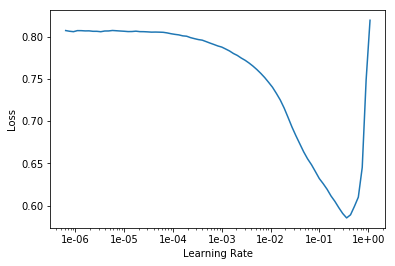

In [24]:
learn_orig = learner_from_df(train_df_orig, test_df_orig, 
                             bs=2048, procs=procs, seed=1, 
                             layers=[10000,1000,100], ps=0.66,
                             cbs=[earlystop, reduce_lr, save_cb])

In [25]:
learn_orig.fit_one_cycle(20, 2e-02)

epoch,train_loss,valid_loss,accuracy,roc,time
1,0.467989,0.259379,0.916700,0.843691,00:06
2,0.273129,0.227236,0.917400,0.870598,00:06
3,0.234439,0.223764,0.918500,0.873320,00:06
4,0.223748,0.255658,0.903300,0.878625,00:06
5,0.217264,0.242653,0.907400,0.875373,00:06
6,0.213329,0.226069,0.920100,0.877238,00:06
7,0.207312,0.228615,0.919200,0.875971,00:06
8,0.203268,0.225754,0.917900,0.874649,00:06


Epoch 5: reducing lr to 0.0009356921938165307
Epoch 6: reducing lr to 0.001
Epoch 7: reducing lr to 0.0009874640062350875
Epoch 8: reducing lr to 0.0009504846320134738
Epoch 9: early stopping
Epoch 9: reducing lr to 0.00089091617757105


In [ ]:
# learn_orig.save('v6 roc877')
learn_orig = learn_orig.load('v6 roc877')

In [ ]:
preds_to_csv(learn_orig, append='v6 orig roc877')

---
**Feature Engineering**

In [26]:
# https://www.kaggle.com/gpreda/santander-improved-starter-solution

def add_new_features(df, test_df):
    train_new = df.copy()
    test_new = test_df.copy()
    idx = [c for c in train_new.columns if c not in ['ID_code', 'target']]
    
    for df in [train_new, test_new]:
        df['sum'] = df[idx].sum(axis=1)
        df['sum_sq'] = df['sum']**2
        df['sum_sqrt'] = df['sum']**0.5
        df['mad'] = df[idx].mad(axis=1)
        df['mad_sq'] = df['mad']**2
        df['mad_sqrt'] = df['mad']**0.5
        df['mean'] = df[idx].mean(axis=1)
        df['mean_sq'] = df['mean']**2
        df['mean_sqrt'] = df['mean']**0.5
        df['sem'] = df[idx].sem(axis=1)
        df['sem_sq'] = df['sem']**2
        df['sem_sqrt'] = df['sem']**0.5
        df['std'] = df[idx].std(axis=1)
        df['std_sq'] = df['std']**2
        df['std_sqrt'] = df['std']**0.5
        df['skew'] = df[idx].skew(axis=1)
        df['skew_sq'] = df['skew']**2
        df['kurt'] = df[idx].kurtosis(axis=1)
        df['kurt_sq'] = df['kurt']**2
        df['kurt_sqrt'] = df['kurt']**0.5
        
    print('Train and test shape:',train_new.shape, test_new.shape)
    return train_new, test_new

In [27]:
train_new, test_new = add_new_features(train_df_orig, test_df_orig)

Train and test shape: (200000, 222) (200000, 221)


In [28]:
train_new.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,sum_sq,sum_sqrt,mad,mad_sq,mad_sqrt,mean,mean_sq,mean_sqrt,sem,sem_sq,sem_sqrt,std,std_sq,std_sqrt,skew,skew_sq,kurt,kurt_sq,kurt_sqrt
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,1456.3182,2.120863e+06,38.161737,7.124469,50.758056,2.669170,7.281591,53.021567,2.698442,0.659840,0.435388,0.812305,9.331540,87.077642,3.054757,0.101580,0.010318,1.331023,1.771622,1.153700
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8

Difference between train and valid distribution: 0.00021000000000000185


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


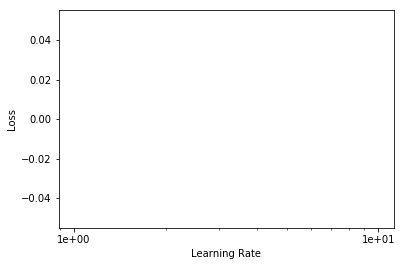

In [30]:
learn_new = learner_from_df(train_new, test_new, 
                            bs=2048, procs=procs, seed=1, 
                            layers=[10000,1000,100], ps=0.7,
                            cbs=[earlystop, reduce_lr, save_cb])

In [ ]:
learn_new.fit_one_cycle(20, 0.04)

In [ ]:
preds_to_csv(learn_new, append='v6 new roc879')